### ヒートマップの一例

In [168]:
using IntervalArithmetic
using LaTeXStrings

In [169]:
include("./heatmap/index.jl")
include("./method1/index.jl")
include("./method3/index.jl")
include("./intervalPCM/index.jl")
include("./twofoldInterval/index.jl")
include("./twofoldIntervalPCM/index.jl")

print()

In [170]:
function revisedMat(
        A₁::Matrix{Interval{T}}, A₂::Matrix{Interval{T}}
        ) where {T <: Real}
    Ã₁⁻, Ã₁⁺ = generateRevisedMatrix(A₁)
    Ã₂⁻, Ã₂⁺ = generateRevisedMatrix(A₂)

    return (Ã₁⁻, Ã₁⁺, Ã₂⁻, Ã₂⁺)
end

revisedMat (generic function with 1 method)

In [171]:
function method1(A₁::Matrix{Interval{T}}, A₂::Matrix{Interval{T}}) where {T <: Real}
    A = intervalPCM2TwofoldIntervalPCM(A₁, A₂)
    result = solveLP_m1(A)
    Â = updatePCM_m1(A, result)
    return Â
end

method1 (generic function with 1 method)

In [172]:
function method3(A₁::Matrix{Interval{T}}, A₂::Matrix{Interval{T}}) where {T <: Real}
    approximationResults = solveApproximationLP_m3.([A₁, A₂])
    tBoundaries = calculateTBoundaries_m3.(approximationResults)
    result = solveConcatLP_m3(approximationResults, tBoundaries)
    Â = generatePCM_m3(result)
    return Â
end

method3 (generic function with 1 method)

In [173]:
function plotAll(A₁::Matrix{Interval{T}}, A₂::Matrix{Interval{T}}) where {T <: Real}
    Â₁ = method1(A₁, A₂)
    Â₁⁻, Â₁⁺ = twofoldIntervalMatrix2intervalMatrices(Â₁)
    display(L"\hat{A}_1^- = %$(intervalMatrixLaTeXString(Â₁⁻))")
    display(L"\hat{A}_1^+ = %$(intervalMatrixLaTeXString(Â₁⁺))")

    Â₃ = method3(A₁, A₂)
    Â₃⁻, Â₃⁺ = twofoldIntervalMatrix2intervalMatrices(Â₃)
    display(L"\hat{A}_3^- = %$(intervalMatrixLaTeXString(Â₃⁻))")
    display(L"\hat{A}_3^+ = %$(intervalMatrixLaTeXString(Â₃⁺))")

    Ã₁⁻, Ã₁⁺, Ã₂⁻, Ã₂⁺ = revisedMat(A₁, A₂)
    display(L"\tilde{A}_1^- = %$(intervalMatrixLaTeXString(Ã₁⁻))")
    display(L"\tilde{A}_1^+ = %$(intervalMatrixLaTeXString(Ã₁⁺))")
    display(L"\tilde{A}_2^- = %$(intervalMatrixLaTeXString(Ã₂⁻))")
    display(L"\tilde{A}_2^+ = %$(intervalMatrixLaTeXString(Ã₂⁺))")

    display(L"\frac{\left| \tilde{A}_{1ij}^- \cap \tilde{A}_{2ij}^- \right|}{\left| \tilde{A}_{1ij}^- \cup \tilde{A}_{2ij}^- \right|}")
    display(plotConincidenceIndices(Ã₁⁻, Ã₂⁻))
    display(L"\frac{\left| \tilde{A}_{1ij}^+ \cap \tilde{A}_{2ij}^+ \right|}{\left| \tilde{A}_{1ij}^+ \cup \tilde{A}_{2ij}^+ \right|}")
    display(plotConincidenceIndices(Ã₁⁺, Ã₂⁺))

    display(L"\frac{\left| \tilde{A}_{1ij}^- \cap \hat{A}_{1ij}^- \right|}{\left| \tilde{A}_{1ij}^- \cup \hat{A}_{1ij}^- \right|}")
    display(plotConincidenceIndices(Ã₁⁻, Â₁⁻))
    display(L"\frac{\left| \tilde{A}_{2ij}^- \cap \hat{A}_{1ij}^- \right|}{\left| \tilde{A}_{2ij}^- \cup \hat{A}_{1ij}^- \right|}")
    display(plotConincidenceIndices(Ã₂⁻, Â₁⁻))
    display(L"\frac{\left| \tilde{A}_{1ij}^+ \cap \hat{A}_{1ij}^+ \right|}{\left| \tilde{A}_{1ij}^+ \cup \hat{A}_{1ij}^+ \right|}")
    display(plotConincidenceIndices(Ã₁⁺, Â₁⁺))
    display(L"\frac{\left| \tilde{A}_{2ij}^+ \cap \hat{A}_{1ij}^+ \right|}{\left| \tilde{A}_{2ij}^+ \cup \hat{A}_{1ij}^+ \right|}")
    display(plotConincidenceIndices(Ã₂⁺, Â₁⁺))
    display(L"\frac{\left| \tilde{A}_{1ij}^- \cap \hat{A}_{3ij}^- \right|}{\left| \tilde{A}_{1ij}^- \cup \hat{A}_{3ij}^- \right|}")
    display(plotConincidenceIndices(Ã₁⁻, Â₃⁻))
    display(L"\frac{\left| \tilde{A}_{2ij}^- \cap \hat{A}_{3ij}^- \right|}{\left| \tilde{A}_{2ij}^- \cup \hat{A}_{3ij}^- \right|}")
    display(plotConincidenceIndices(Ã₂⁻, Â₃⁻))
    display(L"\frac{\left| \tilde{A}_{1ij}^+ \cap \hat{A}_{3ij}^+ \right|}{\left| \tilde{A}_{1ij}^+ \cup \hat{A}_{3ij}^+ \right|}")
    display(plotConincidenceIndices(Ã₁⁺, Â₃⁺))
    display(L"\frac{\left| \tilde{A}_{2ij}^+ \cap \hat{A}_{3ij}^+ \right|}{\left| \tilde{A}_{2ij}^+ \cup \hat{A}_{3ij}^+ \right|}")
    display(plotConincidenceIndices(Ã₂⁺, Â₃⁺))
end

plotAll (generic function with 1 method)

L"$\hat{A}_1^- = \begin{bmatrix} \left[ 1.0, 1.0 \right] & \emptyset & \left[ 0.326, 0.326 \right] \\ \emptyset & \left[ 1.0, 1.0 \right] & \left[ 0.103, 0.103 \right] \\ \left[ 3.065, 3.065 \right] & \left[ 9.7, 9.7 \right] & \left[ 1.0, 1.0 \right] \end{bmatrix}$"

L"$\hat{A}_1^+ = \begin{bmatrix} \left[ 1.0, 1.0 \right] & \left[ 2.2, 3.233 \right] & \left[ 0.25, 0.357 \right] \\ \left[ 0.309, 0.455 \right] & \left[ 1.0, 1.0 \right] & \left[ 0.1, 0.115 \right] \\ \left[ 2.8, 4.0 \right] & \left[ 8.722, 10.0 \right] & \left[ 1.0, 1.0 \right] \end{bmatrix}$"

L"$\hat{A}_3^- = \begin{bmatrix} \left[ 1.0, 1.0 \right] & \left[ 2.861, 3.077 \right] & \left[ 0.303, 0.33 \right] \\ \left[ 0.325, 0.349 \right] & \left[ 1.0, 1.0 \right] & \left[ 0.106, 0.107 \right] \\ \left[ 3.031, 3.3 \right] & \left[ 9.315, 9.443 \right] & \left[ 1.0, 1.0 \right] \end{bmatrix}$"

L"$\hat{A}_3^+ = \begin{bmatrix} \left[ 1.0, 1.0 \right] & \left[ 2.513, 3.2 \right] & \left[ 0.282, 0.33 \right] \\ \left[ 0.312, 0.398 \right] & \left[ 1.0, 1.0 \right] & \left[ 0.102, 0.114 \right] \\ \left[ 3.028, 3.545 \right] & \left[ 8.789, 9.842 \right] & \left[ 1.0, 1.0 \right] \end{bmatrix}$"

L"$\tilde{A}_1^- = \begin{bmatrix} \left[ 1.0, 1.0 \right] & \left[ 3.2, 3.2 \right] & \left[ 0.33, 0.33 \right] \\ \left[ 0.312, 0.312 \right] & \left[ 1.0, 1.0 \right] & \left[ 0.103, 0.103 \right] \\ \left[ 3.031, 3.031 \right] & \left[ 9.7, 9.7 \right] & \left[ 1.0, 1.0 \right] \end{bmatrix}$"

L"$\tilde{A}_1^+ = \begin{bmatrix} \left[ 1.0, 1.0 \right] & \left[ 2.7, 3.288 \right] & \left[ 0.303, 0.333 \right] \\ \left[ 0.304, 0.37 \right] & \left[ 1.0, 1.0 \right] & \left[ 0.1, 0.114 \right] \\ \left[ 3.0, 3.3 \right] & \left[ 8.789, 10.0 \right] & \left[ 1.0, 1.0 \right] \end{bmatrix}$"

L"$\tilde{A}_2^- = \begin{bmatrix} \left[ 1.0, 1.0 \right] & \left[ 2.664, 2.664 \right] & \left[ 0.275, 0.275 \right] \\ \left[ 0.375, 0.375 \right] & \left[ 1.0, 1.0 \right] & \left[ 0.103, 0.103 \right] \\ \left[ 3.642, 3.642 \right] & \left[ 9.7, 9.7 \right] & \left[ 1.0, 1.0 \right] \end{bmatrix}$"

L"$\tilde{A}_2^+ = \begin{bmatrix} \left[ 1.0, 1.0 \right] & \left[ 2.2, 3.254 \right] & \left[ 0.25, 0.357 \right] \\ \left[ 0.307, 0.455 \right] & \left[ 1.0, 1.0 \right] & \left[ 0.102, 0.122 \right] \\ \left[ 2.8, 4.0 \right] & \left[ 8.18, 9.8 \right] & \left[ 1.0, 1.0 \right] \end{bmatrix}$"

L"$\frac{\left| \tilde{A}_{1ij}^- \cap \tilde{A}_{2ij}^- \right|}{\left| \tilde{A}_{1ij}^- \cup \tilde{A}_{2ij}^- \right|}$"

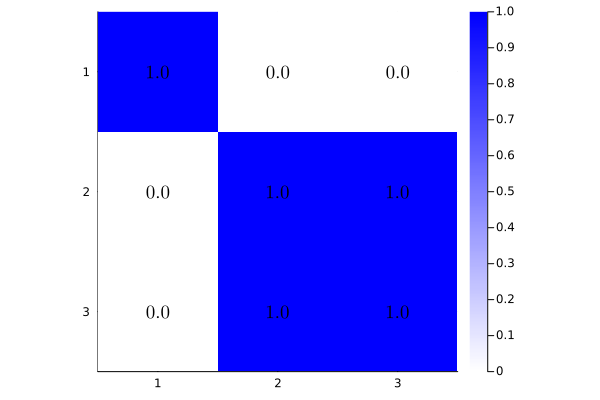

L"$\frac{\left| \tilde{A}_{1ij}^+ \cap \tilde{A}_{2ij}^+ \right|}{\left| \tilde{A}_{1ij}^+ \cup \tilde{A}_{2ij}^+ \right|}$"

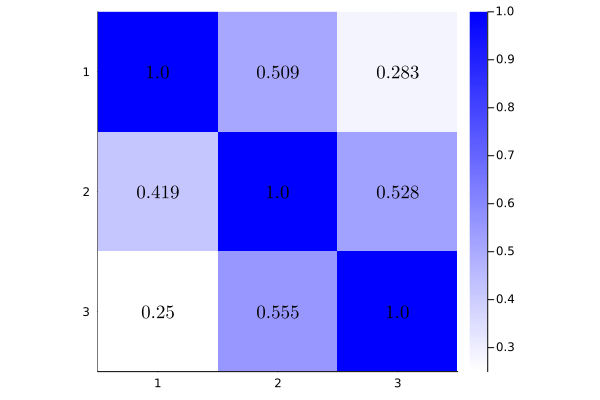

L"$\frac{\left| \tilde{A}_{1ij}^- \cap \hat{A}_{1ij}^- \right|}{\left| \tilde{A}_{1ij}^- \cup \hat{A}_{1ij}^- \right|}$"

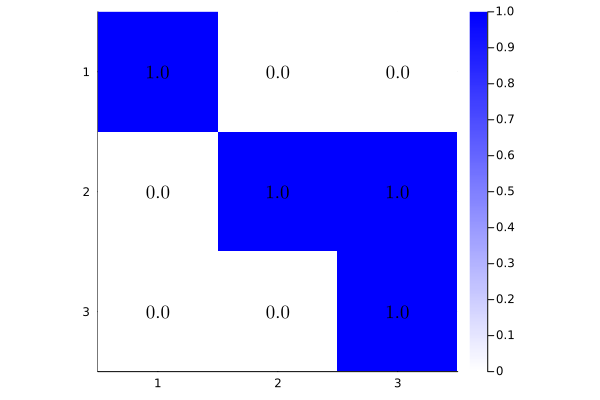

L"$\frac{\left| \tilde{A}_{2ij}^- \cap \hat{A}_{1ij}^- \right|}{\left| \tilde{A}_{2ij}^- \cup \hat{A}_{1ij}^- \right|}$"

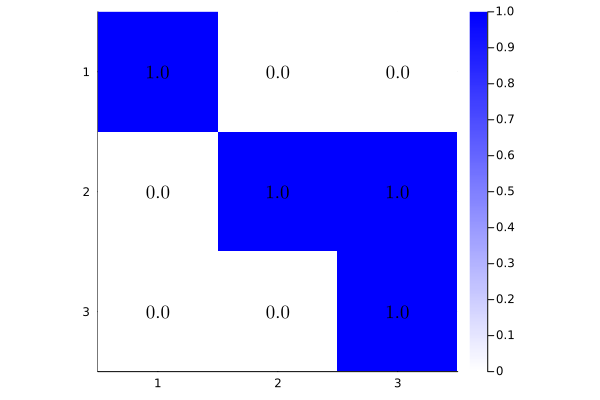

L"$\frac{\left| \tilde{A}_{1ij}^+ \cap \hat{A}_{1ij}^+ \right|}{\left| \tilde{A}_{1ij}^+ \cup \hat{A}_{1ij}^+ \right|}$"

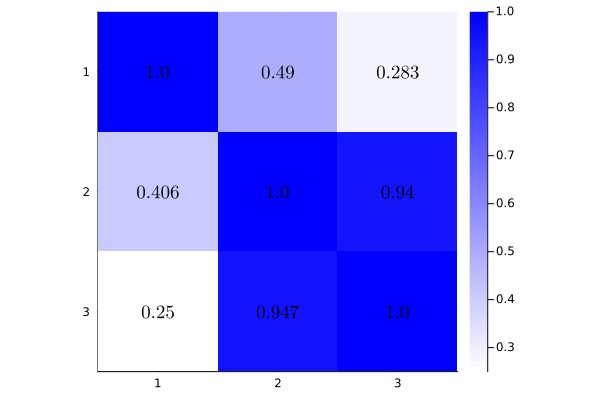

L"$\frac{\left| \tilde{A}_{2ij}^+ \cap \hat{A}_{1ij}^+ \right|}{\left| \tilde{A}_{2ij}^+ \cup \hat{A}_{1ij}^+ \right|}$"

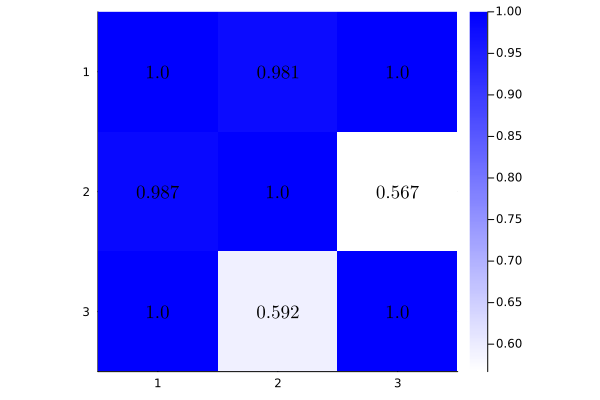

L"$\frac{\left| \tilde{A}_{1ij}^- \cap \hat{A}_{3ij}^- \right|}{\left| \tilde{A}_{1ij}^- \cup \hat{A}_{3ij}^- \right|}$"

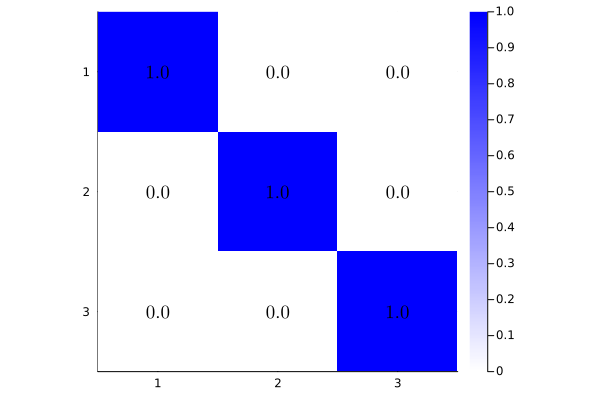

L"$\frac{\left| \tilde{A}_{2ij}^- \cap \hat{A}_{3ij}^- \right|}{\left| \tilde{A}_{2ij}^- \cup \hat{A}_{3ij}^- \right|}$"

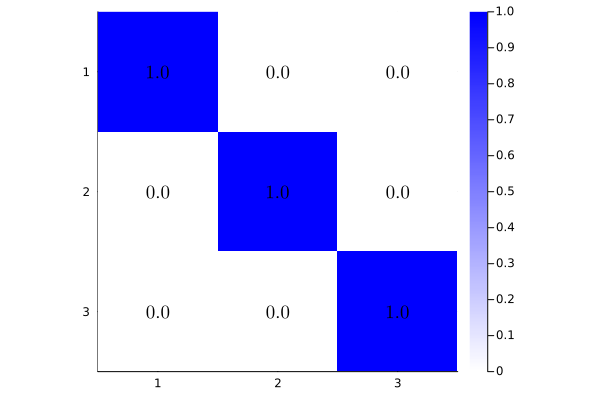

L"$\frac{\left| \tilde{A}_{1ij}^+ \cap \hat{A}_{3ij}^+ \right|}{\left| \tilde{A}_{1ij}^+ \cup \hat{A}_{3ij}^+ \right|}$"

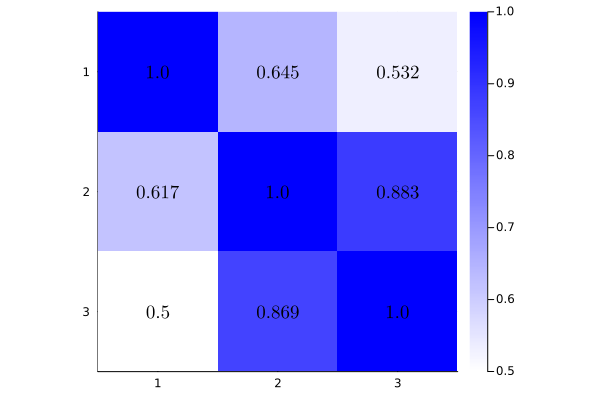

L"$\frac{\left| \tilde{A}_{2ij}^+ \cap \hat{A}_{3ij}^+ \right|}{\left| \tilde{A}_{2ij}^+ \cup \hat{A}_{3ij}^+ \right|}$"

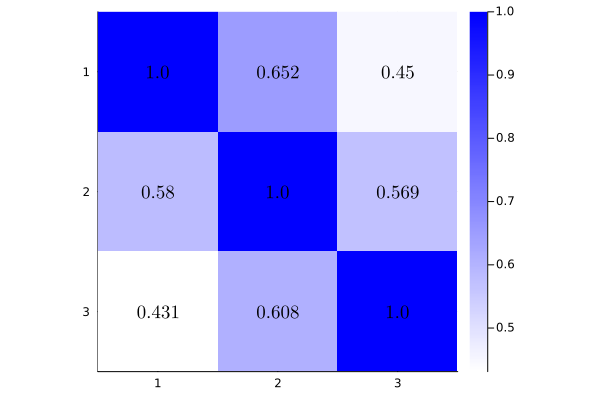

In [174]:
A₁ = [
    1..1 2.7..3.2 (1/3.3)..(1/3)
    (1/3.2)..(1/2.7) 1..1 (1/10)..(1/9.7)
    3..3.3 9.7..10 1..1
]
A₂ = [
    1..1 2.2..2.8 (1/4)..(1/2.8)
    (1/2.8)..(1/2.2) 1..1 (1/9.8)..(1/9.7)
    2.8..4 9.7..9.8 1..1
]

plotAll(A₁, A₂)